In [1]:
from datetime import datetime
import numpy as np             #for numerical computations like log,exp,sqrt etc
import pandas as pd            #for reading & storing data, pre-processing
import matplotlib.pylab as plt #for visualization
#for making sure matplotlib plots are generated in Jupyter notebook itself
%matplotlib inline             
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6

In [2]:
births = pd.read_csv("C:/Users/arlan/Desktop/New folder/_births.csv")
births.head()

,Quarter,Male Live Births
0,2000Q1,7639
1,2000Q2,7365
2,2000Q3,7174
3,2000Q4,6979
4,2001Q1,7496


In [3]:
births['Quarter'] = pd.to_datetime(births['Quarter'],infer_datetime_format=True) #convert from string to datetime
indexedDataset = births.set_index(['Quarter'])
indexedDataset.head(5)

,Male Live Births
Quarter,
2000-01-01,7639
2000-04-01,7365
2000-07-01,7174
2000-10-01,6979
2001-01-01,7496


C:\Users\arlan\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


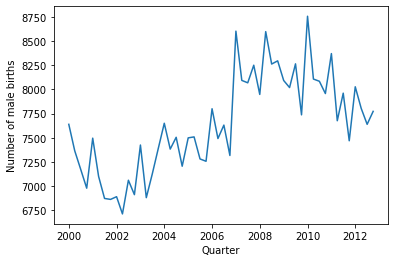

In [4]:
## plot graph
plt.xlabel('Quarter')
plt.ylabel('Number of male births')
plt.plot(indexedDataset)

In [30]:
#Determine rolling statistics
rolmean = indexedDataset.rolling(window=12).mean() #window size 12 denotes 12 months, giving rolling mean at yearly level
rolstd = indexedDataset.rolling(window=12).std()
print(rolmean,rolstd)

            Male Live Births
Quarter                     
2000-01-01               NaN
2000-04-01               NaN
2000-07-01               NaN
2000-10-01               NaN
2001-01-01               NaN
2001-04-01               NaN
2001-07-01               NaN
2001-10-01               NaN
2002-01-01               NaN
2002-04-01               NaN
2002-07-01               NaN
2002-10-01       7088.916667
2003-01-01       7071.083333
2003-04-01       7030.750000
2003-07-01       7026.666667
2003-10-01       7060.833333
2004-01-01       7073.666667
2004-04-01       7097.166667
2004-07-01       7149.833333
2004-10-01       7178.416667
2005-01-01       7229.083333
2005-04-01       7295.416667
2005-07-01       7313.750000
2005-10-01       7342.500000
2006-01-01       7373.750000
2006-04-01       7424.666667
2006-07-01       7466.833333
2006-10-01       7460.833333
2007-01-01       7540.166667
2007-04-01       7599.333333
2007-07-01       7646.250000
2007-10-01       7733.250000
2008-01-01    

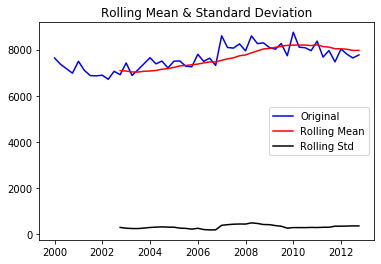

In [31]:
#Plot rolling statistics
orig = plt.plot(indexedDataset, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [32]:
#Perform Augmented Dickey–Fuller test:
print('Results of Dickey Fuller Test:')
dftest = adfuller(indexedDataset['Male Live Births'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

Results of Dickey Fuller Test:
Test Statistic                 -1.135881
p-value                         0.700553
#Lags Used                      3.000000
Number of Observations Used    48.000000
Critical Value (1%)            -3.574589
Critical Value (5%)            -2.923954
Critical Value (10%)           -2.600039
dtype: float64


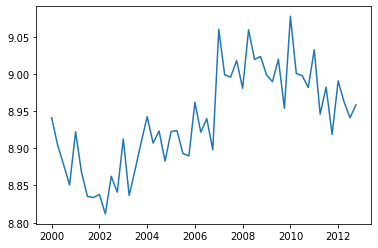

In [33]:
#Estimating trend
indexedDataset_logScale = np.log(indexedDataset)
plt.plot(indexedDataset_logScale)

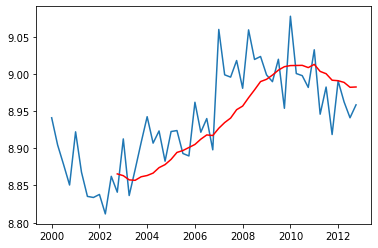

In [35]:
#The below transformation is required to make series stationary
movingAverage = indexedDataset_logScale.rolling(window=12).mean()
movingSTD = indexedDataset_logScale.rolling(window=12).std()
plt.plot(indexedDataset_logScale)
plt.plot(movingAverage, color='red')

In [37]:
datasetLogScaleMinusMovingAverage = indexedDataset_logScale - movingAverage
datasetLogScaleMinusMovingAverage.head(12)

#Remove NAN values
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(10)

,Male Live Births
Quarter,
2002-10-01,-0.024560
2003-01-01,0.049401
2003-04-01,-0.021023
2003-07-01,0.014394
2003-10-01,0.046019
2004-01-01,0.079038
2004-04-01,0.040267
2004-07-01,0.049326
2004-10-01,0.004606


In [38]:
def test_stationarity(timeseries):
    
    #Determine rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    
    #Plot rolling statistics
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey–Fuller test:
    print('Results of Dickey Fuller Test:')
    dftest = adfuller(timeseries['Male Live Births'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

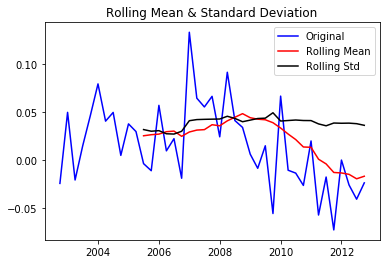

Results of Dickey Fuller Test:
Test Statistic                 -2.109502
p-value                         0.240711
#Lags Used                      1.000000
Number of Observations Used    39.000000
Critical Value (1%)            -3.610400
Critical Value (5%)            -2.939109
Critical Value (10%)           -2.608063
dtype: float64


In [39]:
test_stationarity(datasetLogScaleMinusMovingAverage)

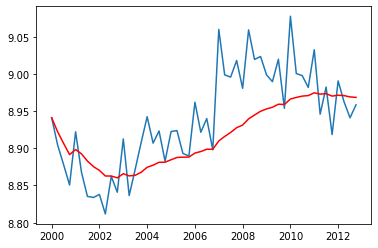

In [40]:
exponentialDecayWeightedAverage = indexedDataset_logScale.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(indexedDataset_logScale)
plt.plot(exponentialDecayWeightedAverage, color='red')

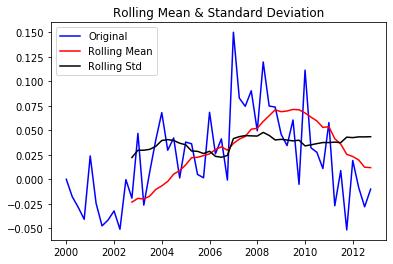

Results of Dickey Fuller Test:
Test Statistic                 -2.111730
p-value                         0.239824
#Lags Used                      1.000000
Number of Observations Used    50.000000
Critical Value (1%)            -3.568486
Critical Value (5%)            -2.921360
Critical Value (10%)           -2.598662
dtype: float64


In [41]:
datasetLogScaleMinusExponentialMovingAverage = indexedDataset_logScale - exponentialDecayWeightedAverage
test_stationarity(datasetLogScaleMinusExponentialMovingAverage)

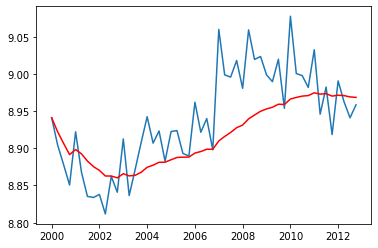

In [42]:
exponentialDecayWeightedAverage = indexedDataset_logScale.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(indexedDataset_logScale)
plt.plot(exponentialDecayWeightedAverage, color='red')

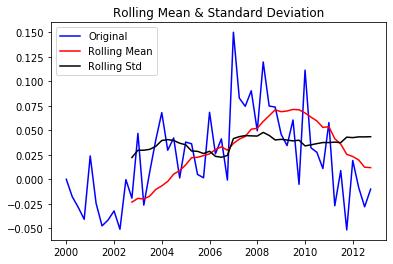

Results of Dickey Fuller Test:
Test Statistic                 -2.111730
p-value                         0.239824
#Lags Used                      1.000000
Number of Observations Used    50.000000
Critical Value (1%)            -3.568486
Critical Value (5%)            -2.921360
Critical Value (10%)           -2.598662
dtype: float64


In [43]:
datasetLogScaleMinusExponentialMovingAverage = indexedDataset_logScale - exponentialDecayWeightedAverage
test_stationarity(datasetLogScaleMinusExponentialMovingAverage)

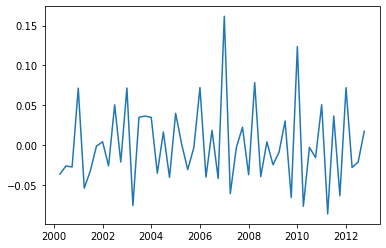

In [44]:
datasetLogDiffShifting = indexedDataset_logScale - indexedDataset_logScale.shift()
plt.plot(datasetLogDiffShifting)

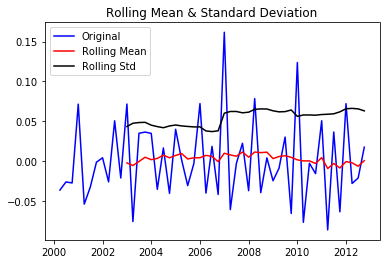

Results of Dickey Fuller Test:
Test Statistic                -6.696353e+00
p-value                        3.990516e-09
#Lags Used                     2.000000e+00
Number of Observations Used    4.800000e+01
Critical Value (1%)           -3.574589e+00
Critical Value (5%)           -2.923954e+00
Critical Value (10%)          -2.600039e+00
dtype: float64


In [45]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationarity(datasetLogDiffShifting)

C:\Users\arlan\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app
C:\Users\arlan\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


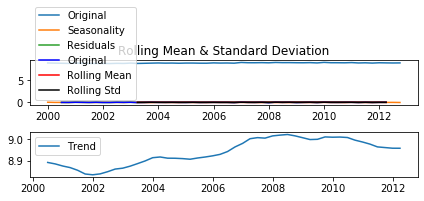

Results of Dickey Fuller Test:
Test Statistic                -6.657275e+00
p-value                        4.947778e-09
#Lags Used                     3.000000e+00
Number of Observations Used    4.400000e+01
Critical Value (1%)           -3.588573e+00
Critical Value (5%)           -2.929886e+00
Critical Value (10%)          -2.603185e+00
dtype: float64


In [46]:
decomposition = seasonal_decompose(indexedDataset_logScale) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(indexedDataset_logScale, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(411)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')

plt.subplot(411)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

plt.tight_layout()

#there can be cases where an observation simply consisted of trend & seasonality. In that case, there won't be 
#any residual component & that would be a null or NaN. Hence, we also remove such cases.
decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

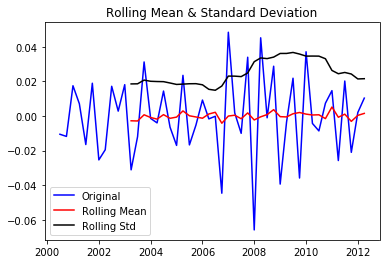

Results of Dickey Fuller Test:
Test Statistic                -6.657275e+00
p-value                        4.947778e-09
#Lags Used                     3.000000e+00
Number of Observations Used    4.400000e+01
Critical Value (1%)           -3.588573e+00
Critical Value (5%)           -2.929886e+00
Critical Value (10%)          -2.603185e+00
dtype: float64


In [48]:
decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

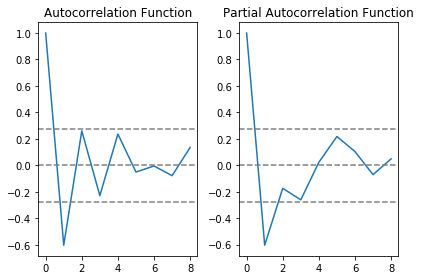

In [52]:
#ACF & PACF plots

lag_acf = acf(datasetLogDiffShifting, nlags=8)
lag_pacf = pacf(datasetLogDiffShifting, nlags=8, method='ols')

#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')            

#Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')
            
plt.tight_layout() 

C:\Users\arlan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\arlan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


Plotting AR model


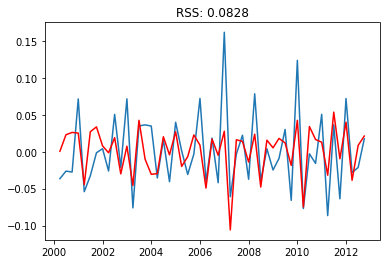

In [53]:
#AR Model
#making order=(2,1,0) gives RSS=1.5023
model = ARIMA(indexedDataset_logScale, order=(2,1,0))
results_AR = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_AR.fittedvalues - datasetLogDiffShifting['Male Live Births'])**2))
print('Plotting AR model')

C:\Users\arlan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\arlan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


Plotting MA model


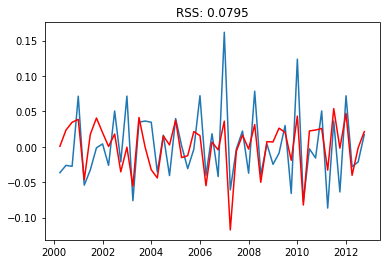

In [54]:
model = ARIMA(indexedDataset_logScale, order=(0,1,2))
results_MA = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_MA.fittedvalues - datasetLogDiffShifting['Male Live Births'])**2))
print('Plotting MA model')

C:\Users\arlan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\arlan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


Plotting ARIMA model


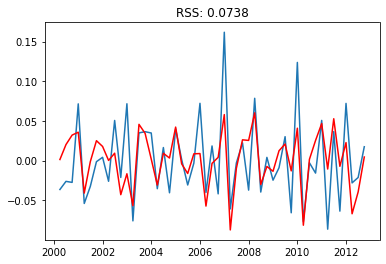

In [55]:
# AR+I+MA = ARIMA model
model = ARIMA(indexedDataset_logScale, order=(2,1,2))
results_ARIMA = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_ARIMA.fittedvalues - datasetLogDiffShifting['Male Live Births'])**2))
print('Plotting ARIMA model')

In [56]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

Quarter
2000-04-01    0.001287
2000-07-01    0.020136
2000-10-01    0.032080
2001-01-01    0.035721
2001-04-01   -0.041033
dtype: float64


In [57]:
#Convert to cumulative sum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum)

Quarter
2000-04-01    0.001287
2000-07-01    0.021423
2000-10-01    0.053504
2001-01-01    0.089225
2001-04-01    0.048191
2001-07-01    0.046787
2001-10-01    0.071827
2002-01-01    0.089585
2002-04-01    0.089693
2002-07-01    0.098937
2002-10-01    0.055884
2003-01-01    0.039200
2003-04-01   -0.017748
2003-07-01    0.027883
2003-10-01    0.062176
2004-01-01    0.064013
2004-04-01    0.033094
2004-07-01    0.042241
2004-10-01    0.045409
2005-01-01    0.087593
2005-04-01    0.083416
2005-07-01    0.067071
2005-10-01    0.075523
2006-01-01    0.084336
2006-04-01    0.026905
2006-07-01    0.023339
2006-10-01    0.027366
2007-01-01    0.085305
2007-04-01   -0.002189
2007-07-01   -0.012008
2007-10-01    0.014103
2008-01-01    0.039479
2008-04-01    0.099655
2008-07-01    0.069418
2008-10-01    0.061954
2009-01-01    0.048395
2009-04-01    0.060754
2009-07-01    0.081587
2009-10-01    0.068568
2010-01-01    0.109340
2010-04-01    0.027772
2010-07-01    0.029284
2010-10-01    0.054586
201

In [58]:
predictions_ARIMA_log = pd.Series(indexedDataset_logScale['Male Live Births'].iloc[0], index=indexedDataset_logScale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA_log.head()

Quarter
2000-01-01    8.941022
2000-04-01    8.942309
2000-07-01    8.962445
2000-10-01    8.994526
2001-01-01    9.030247
dtype: float64

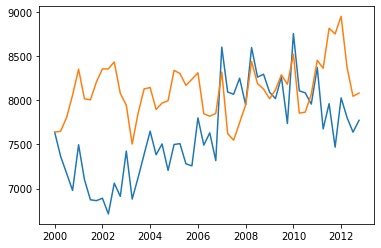

In [59]:
# Inverse of log is exp.
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(indexedDataset)
plt.plot(predictions_ARIMA)

In [60]:
indexedDataset_logScale

,Male Live Births
Quarter,
2000-01-01,8.941022
2000-04-01,8.904494
2000-07-01,8.878219
2000-10-01,8.850661
2001-01-01,8.922125
2001-04-01,8.867991
2001-07-01,8.835356
2001-10-01,8.833900
2002-01-01,8.837971


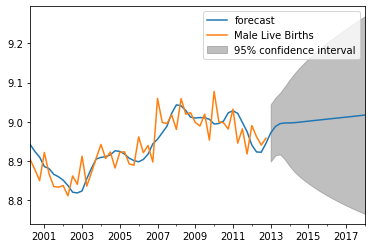

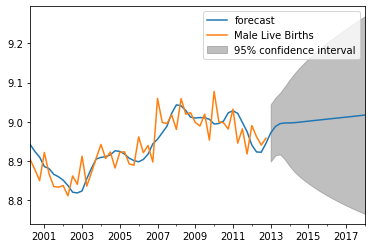

In [61]:
#We have 48(existing data of 12 yrs in months) data points. 
#And we want to forecast for additional 32 data points or 5 yrs.
results_ARIMA.plot_predict(1,72) 
#x=results_ARIMA.forecast(steps=120)